# Import common Module

In [2]:
%config IPCompleter.greedy=True

In [12]:
import sys
sys.version_info

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)

In [13]:
import sklearn
sklearn.__version__

'0.22.1'

In [14]:
import numpy as np
import os
np.random.seed(42)

In [15]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [16]:
# Utility functions

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation = "nearest")
    plt.axis("off")

# MNIST

In [1]:
# Download MNIST data

from sklearn.datasets import fetch_openml

mnist =  fetch_openml('mnist_784', version=1)

In [9]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
#mnist['data'][0]

X, Y = mnist['data'], mnist['target']
X.shape

(70000, 784)

3


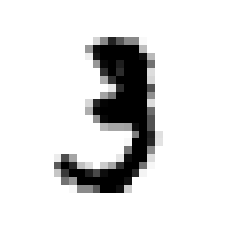

In [17]:
sometarget = Y[10]
somedata = X[10]
print(sometarget)
plot_digit(somedata)

In [21]:
# Note that the label is a string. Most ML algorithms expect numbers, so let’s cast y to integer:

Y = Y.astype(np.uint8)
Y[11]

5

In [22]:
# Lets split the data into training and test with 60,000 images in training set and rest 10000 in test set

train_x, test_x, train_y, test_y = X[:6000], X[6000:7000], Y[:6000], Y[6000:7000]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(6000, 784)
(6000,)
(1000, 784)
(1000,)


# Binary Classifier - Train 5-detector

In [14]:
# preparing trianing and test data

y_train_5 = (train_y == 5)
y_test_5 = (test_y == 5)

print(y_train_5)

[ True False False ...  True False False]


In [18]:
# Use Stochastic Gradient Descent (SGD) Classifier to train the model

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)


In [ ]:
sgd.fit(train_x, y_train_5)


array([False])

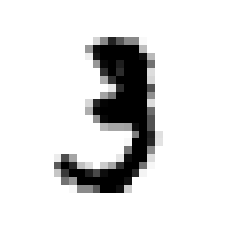

In [16]:
somedata = X[10]
plot_digit(somedata)

sgd.predict([somedata])

# Performance Measures

## Accuracy using Cross-Validation

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, train_x, y_train_5, cv=5, scoring="accuracy")


array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

In [18]:
#Build a DUMB classifier

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    

In [19]:
never5 = Never5Classifier()
cross_val_score(never5, train_x, y_train_5, cv=5, scoring="accuracy")

array([0.91266667, 0.90866667, 0.9095    , 0.90883333, 0.90858333])

In [20]:
somedata = X[20]
Y[20]
somedata.shape
#never5.predict(somedata)

(784,)

## Confusion Matrix

In [21]:
# Get some predicted values

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, train_x, y_train_5, cv=3 )


In [22]:
# Confusion Matrix of 5-detector

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

## Precision and Recall

In [23]:
# Get Precision score of 5-detector

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)


0.8370879772350012

In [24]:
# Get recall score of 5-detector

recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [25]:
# F1 Score of 5-detector

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

## Precision/ Recall TradeOff

In [30]:
somedata = X[0]
Y[0]

5

In [31]:
yscore = sgd.decision_function([somedata])
yscore

array([2164.22030239])

## Plot Precision/ recall Curve

In [32]:
# Get the scores of all the training dataset using cross_val_predict with decision_function as function

yscore = cross_val_predict(sgd, train_x, y_train_5, cv=3, method="decision_function")

In [39]:
# Compute the precision and Recall for all positive thresholds using precision_recall_curve()
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_train_5, yscore)

In [40]:
print(precision)
print(recall)
print(thresholds)

[0.09040123 0.09038606 0.09038757 ... 1.         1.         1.        ]
[1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]
[-106527.45300471 -105763.22240074 -105406.2965229  ...   38871.26391927
   42216.05562787   49441.43765905]


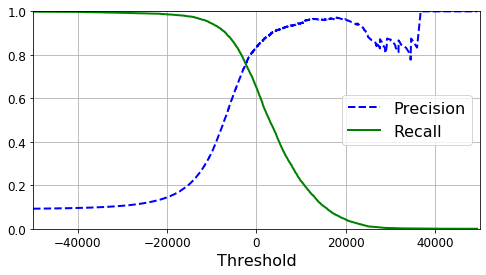

In [41]:
# Plot both precision and recall for the thresholds using matplotlib
# Select the threshold value that gives the best precision/ recall tradeoff to the task at hand.

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])           

plt.figure(figsize=(8, 4))                      
plot_precision_recall_vs_threshold(precision, recall, thresholds)
plt.show()

## ROC Curve

In [43]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, yscore) 

In [44]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
        1.        ]),
 array([0.00000000e+00, 1.84467810e-04, 9.22339052e-04, ...,
        9.99815532e-01, 1.00000000e+00, 1.00000000e+00]),
 array([  49442.43765905,   49441.43765905,   36801.60697028, ...,
        -105763.22240074, -106527.45300471, -146348.56726174]))

In [45]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)   

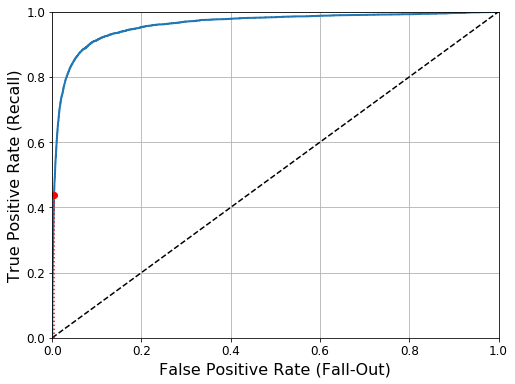

In [51]:
plt.figure(figsize=(8, 6))   

plot_roc_curve(fpr, tpr)

plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
#plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")

In [52]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, yscore)

0.9604938554008616

## Random Forest Classifier - Compare the ROC with SGD

In [53]:
from sklearn.ensemble import RandomForestClassifier

randomf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(randomf, train_x, y_train_5, cv=3, method="predict_proba")

In [58]:
y_score_forest = y_probas_forest[:,1]  
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_score_forest)
#fpr_forest, tpr_forest, thresholds_forest

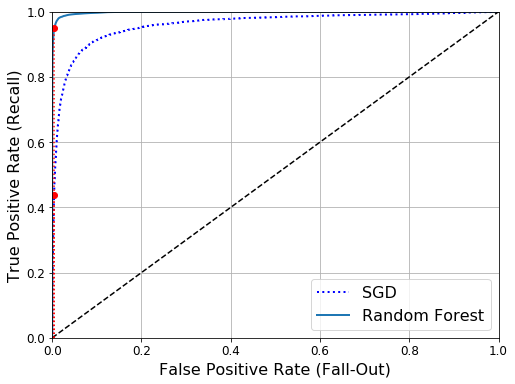

In [56]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [60]:
roc_auc_score(y_train_5, y_score_forest)

0.9983436731328145

In [61]:
y_train_pred_forest = cross_val_predict(randomf, train_x, y_train_5, cv=3)

In [62]:
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [63]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

# Multiclass Classification

In [64]:
train_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Multiclass Classification using SGD Classification

In [23]:
sgd.fit(train_x, train_y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
somedata = X[2]
Y[2]

4

In [25]:
prediction = sgd.predict([somedata])
prediction

array([4], dtype=uint8)

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, train_x, train_y, cv=3, scoring="accuracy")

array([0.8565, 0.8715, 0.8635])

# Improving accuracy using Scaling the features

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled  = scaler.fit_transform(train_x.astype(np.float64))
cross_val_score(sgd, x_train_scaled, train_y, cv=3, scoring = "accuracy")

array([0.8705, 0.8985, 0.8925])

# MultiLabel Classification

In [29]:
# two label
# >= 7
# Odd

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (train_y >= 7)
y_train_odd = (train_y %2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd]


In [30]:
knn = KNeighborsClassifier()
knn.fit(train_x, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
somedata = X[10]
Y[10]

3

In [35]:
prediction = knn.predict([somedata])
prediction

array([[False,  True]])

# Multi-Output Classification

In [37]:
# Adding Noise in training data

import numpy.random as rnd

noise_train = rnd.randint(0,100, (len(train_x), 784) )
x_train_mod = train_x + noise_train

noise_test = rnd.randint(0,100, (len(test_x), 784) )
x_test_mod = test_x + noise_test

# Clean image for label


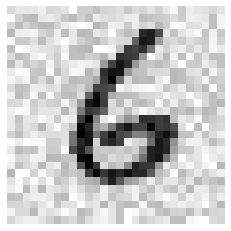

In [47]:
some_index = 0
plot_digit(x_test_mod[some_index])

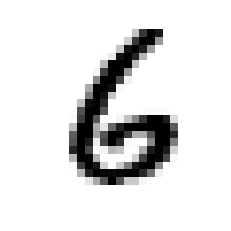

In [48]:
#clean original image
plot_digit(test_x[some_index])

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [42]:
knn.fit(x_train_mod, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
# View Cleaned Images

clean_digit = knn.predict([x_test_mod[some_index]])

In [60]:
clean_digit

array([6], dtype=uint8)

In [63]:
test_y[some_index]

6

In [64]:
plot_digit(clean_digit)

ValueError: cannot reshape array of size 1 into shape (28,28)